In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
health = pd.read_csv('fetal_health.csv')
health_copy = health.copy()
print(health.head(5))

   baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0

In [106]:
health.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [107]:
X = health.iloc[:, :-1].values
y = health.iloc[:, -1].values

In [108]:
y

array([2., 1., 1., ..., 2., 2., 1.])

In [109]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)


In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 0)

In [111]:
X_scaled

array([[-1.35222005, -0.8223883 , -0.20320955, ..., -1.18164215,
         1.87056871,  1.11298001],
       [-0.1325256 ,  0.73013282, -0.20320955, ...,  0.13203796,
        -0.23499819, -0.52452553],
       [-0.03088439, -0.04612774, -0.20320955, ..., -0.00624416,
        -0.2004807 , -0.52452553],
       ...,
       [ 0.68060404, -0.56363478, -0.20320955, ...,  0.96173066,
        -0.51113811,  1.11298001],
       [ 0.68060404, -0.56363478, -0.20320955, ...,  0.8925896 ,
        -0.51113811,  1.11298001],
       [ 0.88388645, -0.30488126, -0.16034157, ...,  0.47774325,
        -0.61469058, -0.52452553]])

In [112]:
from sklearn.svm import SVC

In [113]:
model_C1 = SVC(C=1)
model_C1.fit(X_train, y_train)
clf_c1 = model_C1.fit(X_train, y_train)
model_C1.score(X_test, y_test)

0.9060150375939849

In [114]:
model_C10 = SVC(C=10)
model_C10.fit(X_train, y_train)
clf_c10 = model_C10.fit(X_train, y_train)
model_C10.score(X_test, y_test)

0.9229323308270677

In [115]:
model_C50 = SVC(C=50)
model_C50.fit(X_train, y_train)
clf_c50 = model_C50.fit(X_train, y_train)
model_C50.score(X_test, y_test)

0.9229323308270677

In [116]:
from sklearn.model_selection import cross_val_score

In [117]:
scores1 = cross_val_score(model_C1,X,y, cv=10)
np.average(scores1)

0.8410178049428648

In [118]:
scores10 = cross_val_score(model_C10,X,y, cv=10)
np.average(scores10)

0.8498693418371867

In [119]:
scores50 = cross_val_score(model_C50,X,y, cv=10)
np.average(scores50)

0.8465718841349987

In [120]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(SVC(gamma='auto'), {
    'C': [1,10,50],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)
clf.fit(X_scaled,y)
clf.cv_results_

{'mean_fit_time': array([0.10023332, 0.09025507, 0.09399323, 0.22074718, 0.07566776,
        0.92014518]),
 'std_fit_time': array([0.0227246 , 0.01460536, 0.01574616, 0.01896516, 0.0056565 ,
        0.18939955]),
 'mean_score_time': array([0.05810947, 0.0114491 , 0.04940572, 0.01076727, 0.03511653,
        0.00859656]),
 'std_score_time': array([0.01235007, 0.00433681, 0.01017375, 0.00255261, 0.005781  ,
        0.00340521]),
 'param_C': masked_array(data=[1, 1, 10, 10, 50, 50],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 50, 'kernel': 'rbf'},
  {'C': 50, 'kernel': 'linear'}],


In [121]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.100233,0.022725,0.058109,0.012350,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.838028,0.861176,0.910588,0.877647,0.741176,0.845723,0.057367,1
1,0.090255,0.014605,0.011449,0.004337,1,linear,"{'C': 1, 'kernel': 'linear'}",0.840376,0.854118,0.908235,0.889412,0.715294,0.841487,0.067583,3
2,0.093993,0.015746,0.049406,0.010174,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.830986,0.861176,0.912941,0.875294,0.722353,0.840550,0.064707,4
3,0.220747,0.018965,0.010767,0.002553,10,linear,"{'C': 10, 'kernel': 'linear'}",0.838028,0.858824,0.905882,0.889412,0.710588,0.840547,0.069117,5
4,0.075668,0.005656,0.035117,0.005781,50,rbf,"{'C': 50, 'kernel': 'rbf'}",0.833333,0.865882,0.910588,0.863529,0.715294,0.837725,0.065994,6
5,0.920145,0.189400,0.008597,0.003405,50,linear,"{'C': 50, 'kernel': 'linear'}",0.838028,0.861176,0.905882,0.891765,0.710588,0.841488,0.069583,2


In [122]:
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.845723
1,1,linear,0.841487
2,10,rbf,0.840550
3,10,linear,0.840547
4,50,rbf,0.837725
5,50,linear,0.841488


In [124]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(SVC(), {
        'C': [1,10,50],
        'kernel': ['rbf','linear']
    }, 
    cv=5, 
    return_train_score=False, 
    n_iter=2
)
rs.fit(X_scaled,y)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,10,linear,0.840547
1,1,rbf,0.845722


In [125]:
def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==2)]
    star = X[np.argwhere(y==3)]
    plt.scatter([s[0][0] for s in spam],
                   [s[0][1] for s in spam],
                   s = 25,
                   color = 'cyan',
                   edgecolor = 'k',
                   marker = '^')
    plt.scatter([s[0][0] for s in ham],
                   [s[0][1] for s in ham],
                   s = 25,
                   color = 'red',
                   edgecolor = 'k',
                   marker = 's')
    plt.scatter([s[0][0] for s in star],
                   [s[0][1] for s in star],
                   s = 25,
                   color = 'yellow',
                   edgecolor = 'k',
                   marker = 's')
    plt.xlabel('X_test')
    plt.ylabel('Y_test')
    plt.legend(['label 2','label 1','label 0'])

# def plot_model(X, y, model):
#     X = np.array(X)
#     y = np.array(y)
#     plot_step = 0.01
#     x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
#                          np.arange(y_min, y_max, plot_step))
#     Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)
#     pyplot.contour(xx, yy, Z,colors = 'k',linewidths = 3)
#     plot_points(X, y)
#     pyplot.contourf(xx, yy, Z, colors=['red', 'blue'], alpha=0.2, levels=range(-1,2))
#     pyplot.show()

SVM with C = 1

Accuracy: 0.9060150375939849


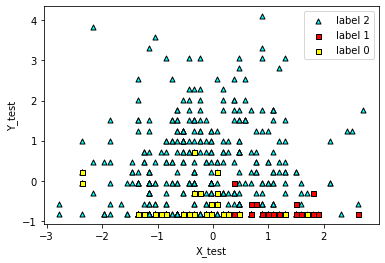

In [129]:

y_pred_c1 = model_C1.predict(X_test)
plot_points(X_test, y_pred_c1)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_c1))


SVM with C = 10

Accuracy: 0.9229323308270677


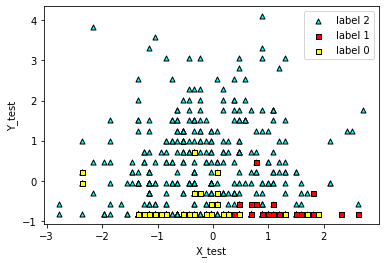

In [130]:
y_pred_c10 = model_C10.predict(X_test)
plot_points(X_test, y_pred_c10)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_c10))


SVM with C = 50

Accuracy: 0.9229323308270677


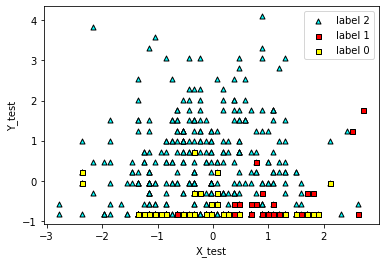

In [131]:
y_pred_c50 = model_C50.predict(X_test)
plot_points(X_test, y_pred_c50)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_c50))

In [133]:
plot_model(X_test, y_pred, model_C1)

ValueError: X.shape[1] = 2 should be equal to 21, the number of features at training time